<a href="https://colab.research.google.com/github/Harisha-AlmaBetter/Play-Store-Analysis-EDA-AlmaBetter/blob/main/Play_Store_App_Review_Analysis(Capstone_Project_1)_Harisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> Play Store App Review Analysis(EDA)

#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

#Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

#Explore and analyze the data to discover key factors responsible for app engagement and success.



#In this project, I will try to explore, visualize and answer some of the questions from the Google Play Store Dataset. 
#I will be applying some of the analysis techniques to analyze the dataaset with help of tools like:- Python, Pandas, Matplotlib, Numpy, Seaborn. 
#While doing this project I have learned many techniques and gained various skills in Exploratory Data Analysis Domain.

#This project aims to use the knowledge gained in Data Wrangling class on Goggle Play Store database.

#**The Google Play Store** is a digital distribution service operated and developed by Google Inc. It serves as the official app store for the Android operating system, allowing users to browse and download applications developed with the Android SDK and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.

#**Methods**
#In this project, we will search for trends in the Google Play Store Apps dataset available in shared drive of AlmaBetter School. For this purpose, we will determine some initial hypotheses and try to find information that helps to consolidate it. We are going to work on this project with Python using Google Colab.
#**Setting up and downloading the data**
#The packages used in this project are:
#**google.colab:** files manipulation in Google Colab;
#**AlmaBetter**: import the dataset from the AlmaBetter website;
#**pandas**: dataset manipulations;
#**NumPy**: deal with mathematical operations;
#**Pyplot**: create graphics and tables.
# Matplotlib:
#Seaborm

#**Data Sets**:Analyzed with the help of two data sets. 
#1)**Playstore.csv**: It consists of 13 columns:- App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver with 10841 Rows.
#2)**User Reviews**: 


#<b> Import libraries/packages


In [1]:
pip install pandas 

In [2]:
#import library
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
%matplotlib inline

#<b> Loading Dataset: Play Store Data

In [3]:
#read to Play store csv files
apps_df = pd.read_csv('/content/drive/MyDrive/PROJECT/Play Store Data.csv')

###Checking for Columns in the dataset-Play store data.csv

In [4]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
print('Number of Rows',apps_df.shape[0])
print('Number of Columns',apps_df.shape[1])#To Find shape of our Dataset(no.of rows & coloumns)

Number of Rows 10841
Number of Columns 13


###Understanding data sets

In [6]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
apps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


###To Understand overall statistics about the dataframe

In [8]:
apps_df.describe(include='all')#Overall statistics about the df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


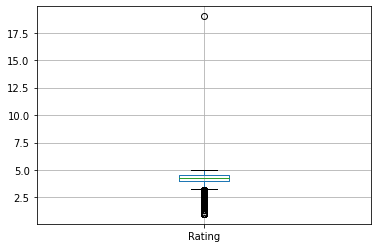

In [9]:
apps_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb23321bd90>]],
      dtype=object)

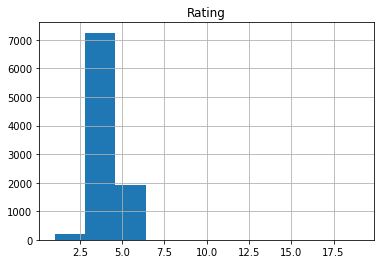

In [10]:
apps_df.hist()

In [11]:
apps_df.nunique()#to understand unique values

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [12]:
apps_df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [13]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#<B> Cleaning Data

In [14]:
apps_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
def printinfo():
    temp = pd.DataFrame(index=apps_df.columns)
    temp['data_type'] = apps_df.dtypes
    temp['null_count'] = apps_df.isnull().sum()
    temp['unique_count'] = apps_df.nunique()
    return temp

In [17]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


## To check how many ratings are more than 5 - Outliers

In [18]:
apps_df[apps_df.Rating > 5] # To check the rating value>5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
apps_df.drop(apps_df.index[10472], inplace=True)# Row 10472 removed due to missing value of Category

###Row 10472 removed due to data mismatch in the category

In [20]:
apps_df[10470:10475]#To check whether row 10472 has been removed or not.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


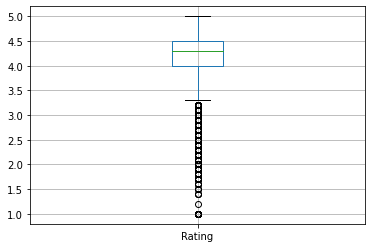

In [21]:
apps_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb232cc7350>]],
      dtype=object)

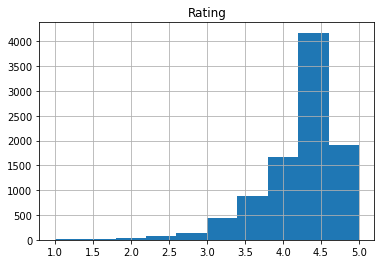

In [22]:
apps_df.hist()#Rightly skewed

##Data Imputation and Manipulation
Fill the null values with appropriate values using aggreagate functions such as mean,median or mode.

In [23]:
def inpute_median(series):
  return series.fillna(series.median())#Define a function inpute_median

In [24]:
apps_df.Rating = apps_df['Rating'].transform(inpute_median)

In [25]:
apps_df.isnull().sum()#count the number of null values to each column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [26]:
#modes of categorical values
print(apps_df['Type'].mode())
print(apps_df['Current Ver'].mode())
print(apps_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [27]:
# Fill the missing categorical values with mode
apps_df['Type'].fillna(str(apps_df['Type'].mode().values[0]),inplace=True)
apps_df['Current Ver'].fillna(str(apps_df['Current Ver'].mode().values[0]),inplace=True)
apps_df['Android Ver'].fillna(str(apps_df['Android Ver'].mode().values[0]),inplace=True)

In [28]:
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###Columns like Reviews, Size, Installs, & priceshould have an intor floatdatatype, But here we can see of objecttype, So let’s convert them to their respective correct type.Starting with the column Reviews , converting its type to int .

In [29]:
apps_df['Reviews'] = apps_df.Reviews.astype(int)

In [30]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


###Now, the reviews column has been converted to int type, so now we can move to the Column: Size
Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float .

##Removing the + and , Symbol:

In [31]:
apps_df['Size'] = apps_df.Size.apply(lambda x: x.strip('+'))# Removing the + Sign
apps_df['Size'] = apps_df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`


##Replacing the k by multiplying the value with 1000:
##Replacing the Varies with device value with Nan :


In [32]:
apps_df['Size'] = apps_df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo
apps_df['Size'] = apps_df.replace('Varies with device', np.NaN)

###Now, finally converting all these values to numeric type:


In [33]:
print(apps_df[pd.to_numeric(apps_df['Size'], errors='coerce').isnull()]) # Converting the string to Numeric type

                                                     App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                             Parkinson Exercices FR  ...          2.2 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[10840 rows x 1

In [34]:
apps_df.dropna(subset = ['Size'], inplace=True)

###Converting Price and Installs into Numerical Values.(To convert this column from object to integer type) 


In [35]:
apps_df['Price'] = apps_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
apps_df['Price'] = apps_df['Price'].apply(lambda x: float(x))#Removing '$' from the values.

In [36]:
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: float(x))#Removing '+' from the values.

In [37]:
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'])

In [38]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,9659
Installs,float64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


In [39]:
apps_df['Price'].value_counts()

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

In [40]:
apps_df['Installs'].min(),apps_df['Installs'].max()

(0.0, 1000000000.0)

###Hence, there is a high variance in the number of installs,we need to remove this. For that, we are adding a new column to dataframe, which is the log of number of installs.

In [41]:
apps_df['log_installs'] = np.log2(apps_df['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


###Checking, if the dataframe contains any duplicate values for the same App name.


In [42]:
boolean = apps_df['App'].duplicated().any()
boolean

True

In [43]:
apps_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
ESPN                                                 7
                                                    ..
Thomas & Friends: Delivery                           1
Infinite Painter                                     1
Live DV                                              1
Chest Simulator for Clash Royale                     1
CX Capture                                           1
Name: App, Length: 9659, dtype: int64

###In the above mentioned data, some of the apps are having multiple rows. Let's check out if the data is identical or not.


In [44]:
apps_df[apps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
1653,ROBLOX,GAME,4.5,4447388,ROBLOX,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1701,ROBLOX,GAME,4.5,4447346,ROBLOX,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1748,ROBLOX,GAME,4.5,4448791,ROBLOX,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1841,ROBLOX,GAME,4.5,4449882,ROBLOX,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1870,ROBLOX,GAME,4.5,4449910,ROBLOX,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2016,ROBLOX,FAMILY,4.5,4449910,ROBLOX,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2088,ROBLOX,FAMILY,4.5,4450855,ROBLOX,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2206,ROBLOX,FAMILY,4.5,4450890,ROBLOX,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
4527,ROBLOX,FAMILY,4.5,4443407,ROBLOX,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425


###As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.


In [45]:
apps_df.drop_duplicates(inplace=True)

###Converting type of Reviews column to number


In [46]:
apps_df.describe()#Summary statistics after cleaning

,Rating,Reviews,Installs,Price,log_installs
count,10357.000000,1.035700e+04,1.035700e+04,10357.000000,1.035700e+04
mean,4.203737,4.059046e+05,1.415776e+07,1.030800,-inf
std,0.485594,2.696778e+06,8.023955e+07,16.278625,NaN
min,1.000000,0.000000e+00,0.000000e+00,0.000000,-inf
25%,4.100000,3.200000e+01,1.000000e+03,0.000000,9.965784e+00
50%,4.300000,1.680000e+03,1.000000e+05,0.000000,1.660964e+01
75%,4.500000,4.641600e+04,1.000000e+06,0.000000,1.993157e+01
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2.989735e+01


##After fixing all the issues, we should have a final look at the data frame.

In [47]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,9659
Installs,float64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


##Now, we are finally done. In this section Data Preparation and Cleaning. We can see that the original dataset contained 10841 Rows and 13 Columns. It contained App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Curernt Ver, Android Ver and log_installs columns. But after cleansing the dataset and dropping the unwanted rows and columns having Null Values and garbage data from the data frame, we are left with 9659 Rows and 10 Columns.

#<B> Exploratory analysis and Data Visualization

###Setting up the parameters for the plots




In [48]:
sns.set_style('darkgrid')
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.rcParams['lines.markersize'] ** 2.
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

##The top categories in the play store, which contains the highest number of appS.


In [49]:
y = apps_df['Category'].value_counts().index
x = apps_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

##We have defined our x and y axis. Let us plot and see

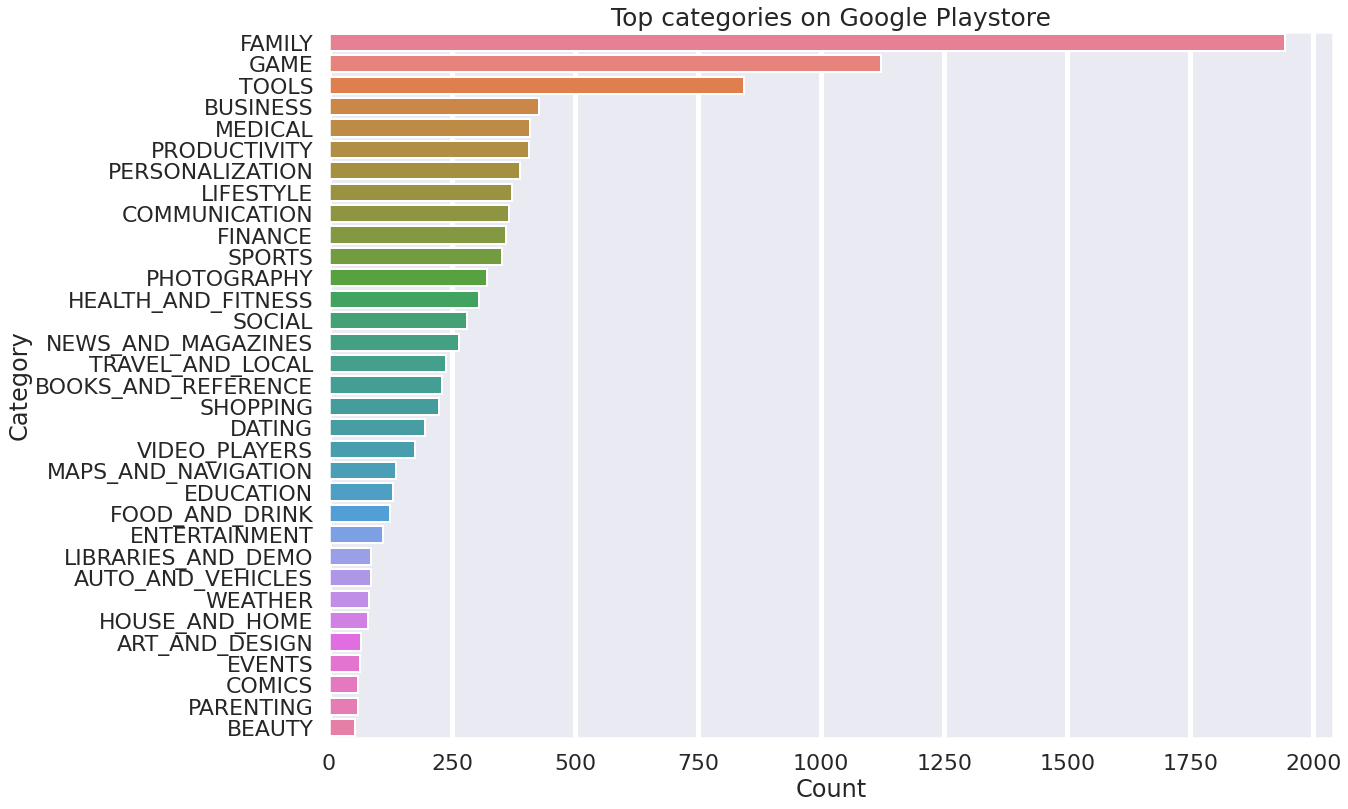

In [50]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

###So there are all total of 33 categories in the dataset from the above output we can come to the conclusion that in the play store most of the apps are under Family & Game category and least are of Beauty & Comics Category.

##Category of Apps from the ‘Content Rating’ column found on the play store(Age wise).

In [51]:
x2 = apps_df['Content Rating'].value_counts().index
y2 = apps_df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

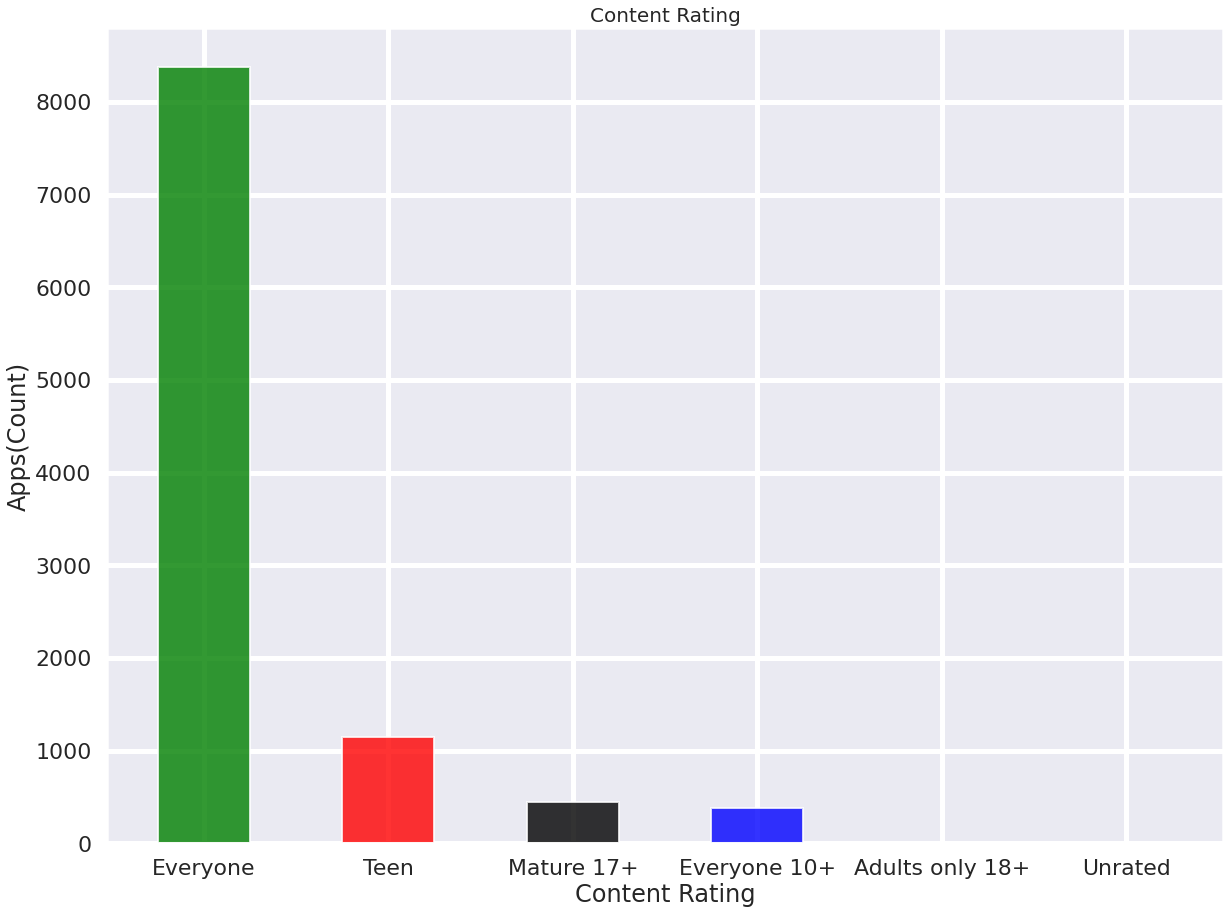

In [52]:
plt.figure(figsize=(20,15))
plt.bar(x2sis,y2sis,width=0.5,color=['green', 'red', 'black', 'blue', 'cyan', 'pink'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

##Everyone category has the highest number of apps.

Text(0.5, 1.0, 'Average Rating per Content Rating')

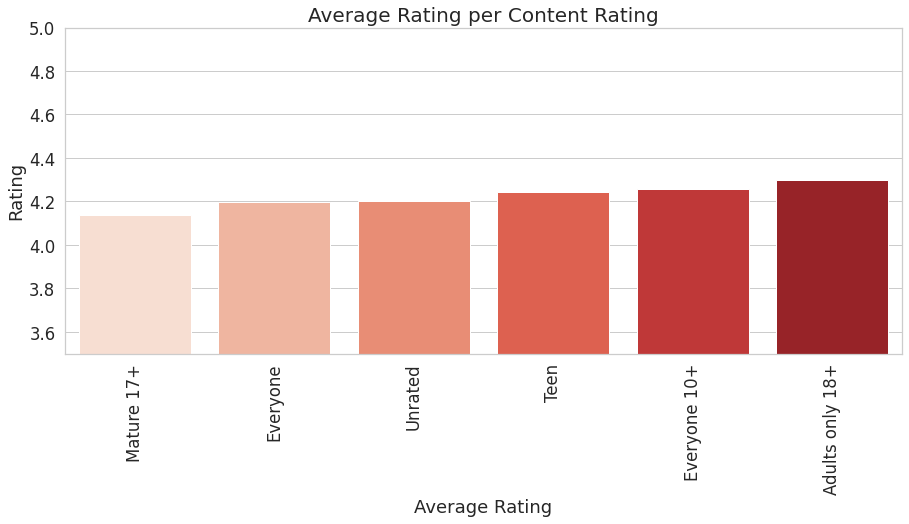

In [53]:
#look at the ratings per app content rating in a sequential order
new_df = apps_df.groupby("Content Rating").Rating.mean().reset_index() #average ratings per category
sorted_df = new_df.sort_values(by=["Rating"], ascending=True)  #sort by rating in descending order

sns.set(font_scale=1.5, style="whitegrid")
f, axes = plt.subplots(figsize=(15, 6), sharex=True)

#since we have categorical data in the x axis, we will look data with a barplot
ax = sns.barplot(x="Content Rating", y="Rating", data=sorted_df, palette="Reds") 
for item in ax.get_xticklabels():
    item.set_rotation(90) #rotate every xticklabels for readability
ax.set(ylim=(3.5,5)) #zoom in y axes since values are distributed around 4
plt.xlabel("Average Rating")
plt.title("Average Rating per Content Rating", size=20)

##Which category App’s have the most number of installs.


In [54]:
highest_Installs_df = apps_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

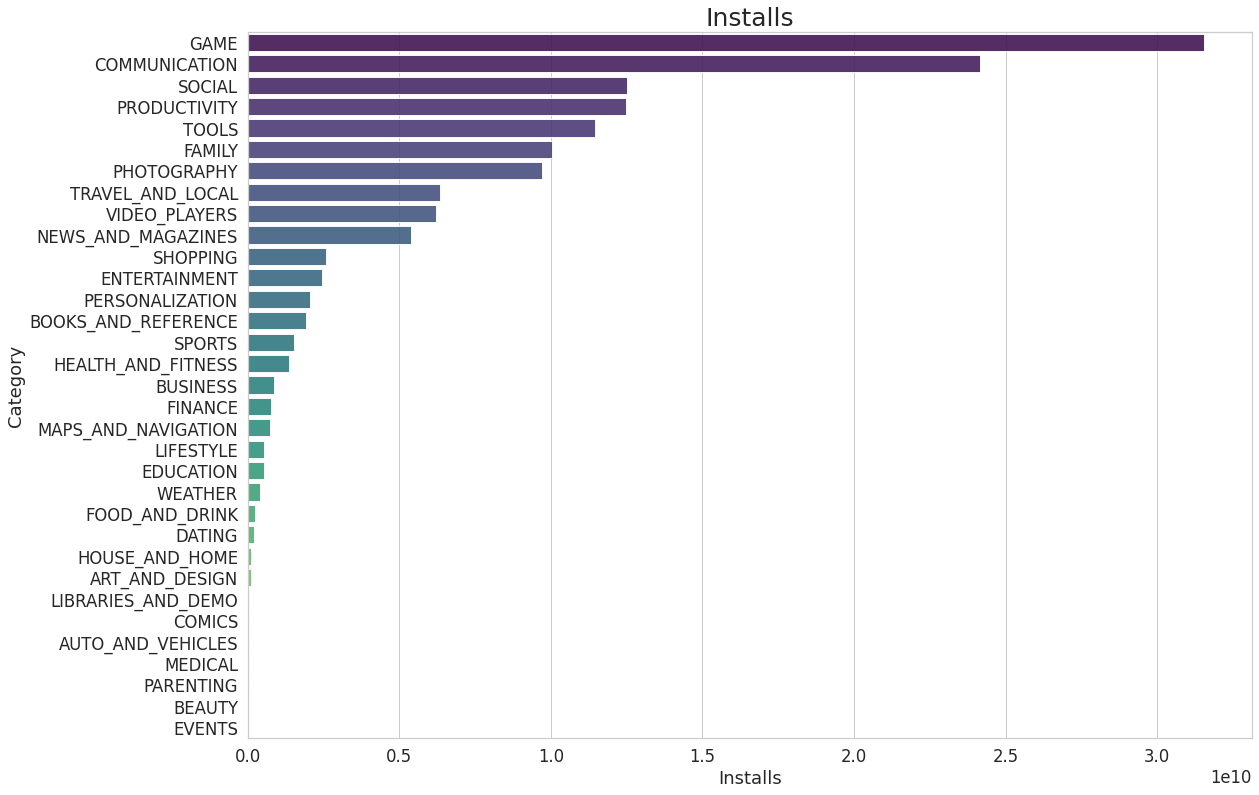

In [55]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

##From the above visualization, it can be interpreted that the top categories with the highest installs are Game,Communication,Tools & Family.

##Top 10 installed apps in any category.


In [56]:
def findtop10incategory(str):
    str = str.upper()
    top10 = apps_df[apps_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_game
    plt.figure(figsize=(10,9))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 90, horizontalalignment='right');

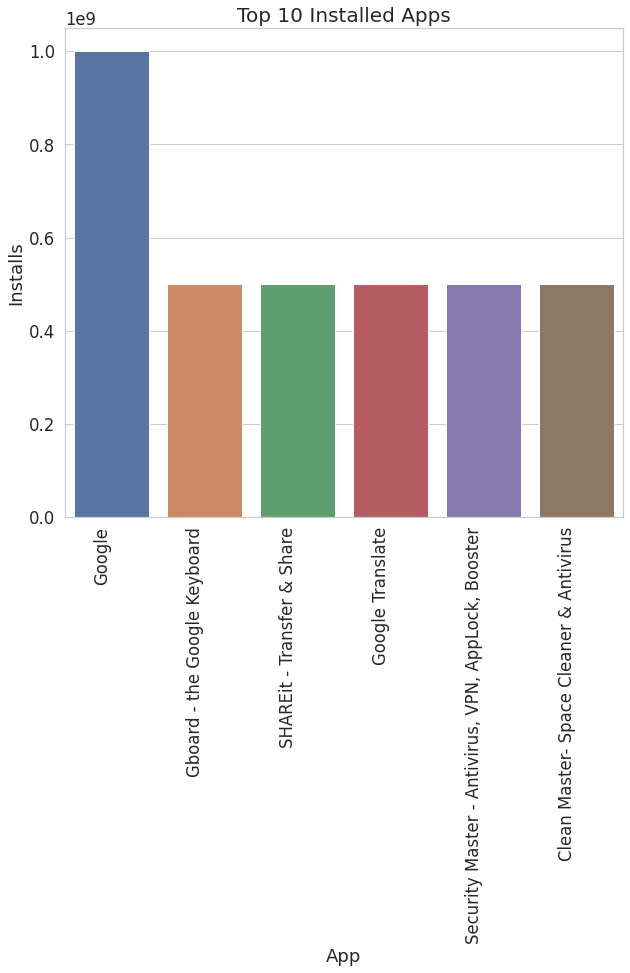

In [57]:
findtop10incategory('TOOLS')

From the above graph, we can see that in the Tools category Google, Share It, Google translate has the highest installs. In the same way by passing different category names to the function, we can get the top 10 installed apps.

##Which are the top 10 expensive Apps in the play store?
We will again need to create a seperate dataframe

In [58]:
top10PaidApps = apps_df[apps_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)# top10PaidApps

In [59]:
top10PaidApps_df = top10PaidApps[['App', 'Installs']].drop(9934)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


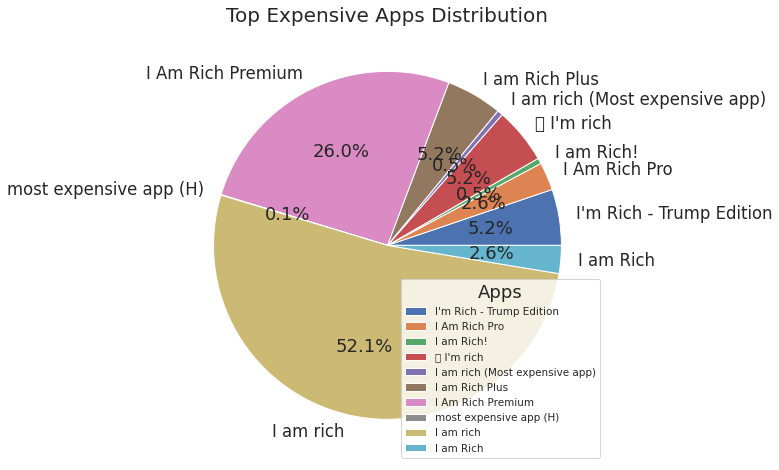

In [60]:
plt.figure(figsize=(10,8));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small");

##From the above graph, we can interpret that the App I am rich is the most expensive app in the google play store followed by I am Rich Premium. we also had to drop one-row data for this visualization because the language of the app was Chinese and it was messing with the pie chart, visualization.

###Grouping all Apps storing in group

In [61]:
grp = apps_df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)#grouping all apps storing in grp

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.336522
BUSINESS               4.175176
COMICS                 4.160000
COMMUNICATION          4.175410
DATING                 4.033673
EDUCATION              4.375385
ENTERTAINMENT          4.136036
EVENTS                 4.395313
FAMILY                 4.203757
FINANCE                4.148056
FOOD_AND_DRINK         4.183871
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
HOUSE_AND_HOME         4.185000
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.133244
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.212990
NEWS_AND_MAGAZINES     4.160985
PARENTING              4.300000
PERSONALIZATION        4.327062
PHOTOGRAPHY            4.189441
PRODUCTIVITY           4.219410
SHOPPING               4.256250
SOCIAL                 4.260714
SPORTS                 4.239031
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.121941

##Category wise Rating

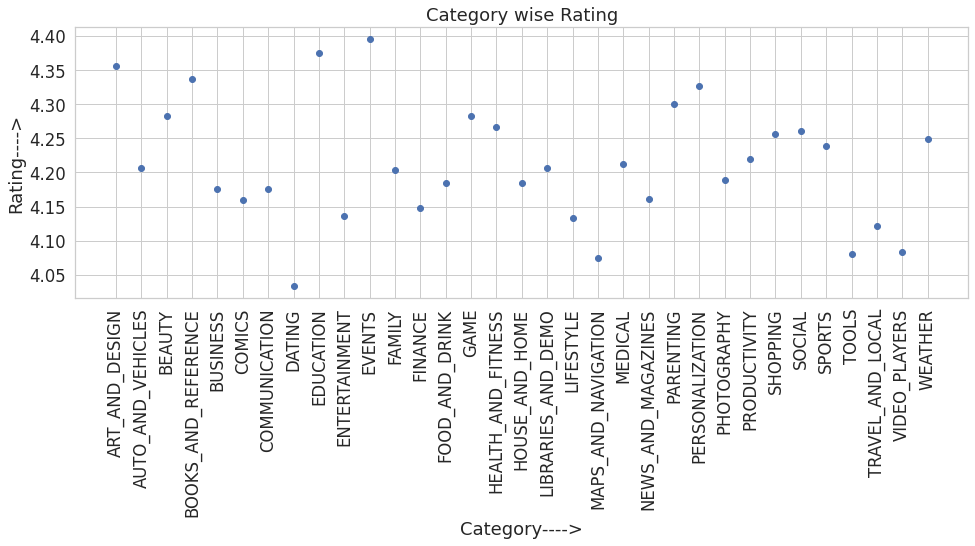

In [62]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color = 'b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Category---->')
plt.ylabel('Rating---->')
plt.show()

##The Events, Art and Design, Education Categories has got the highest Ratings i.e. 4 and above. Whereas, Dating, Maps and navigation, Video players category has got lowest ratings i.e. below 4.

##Category wise Pricing

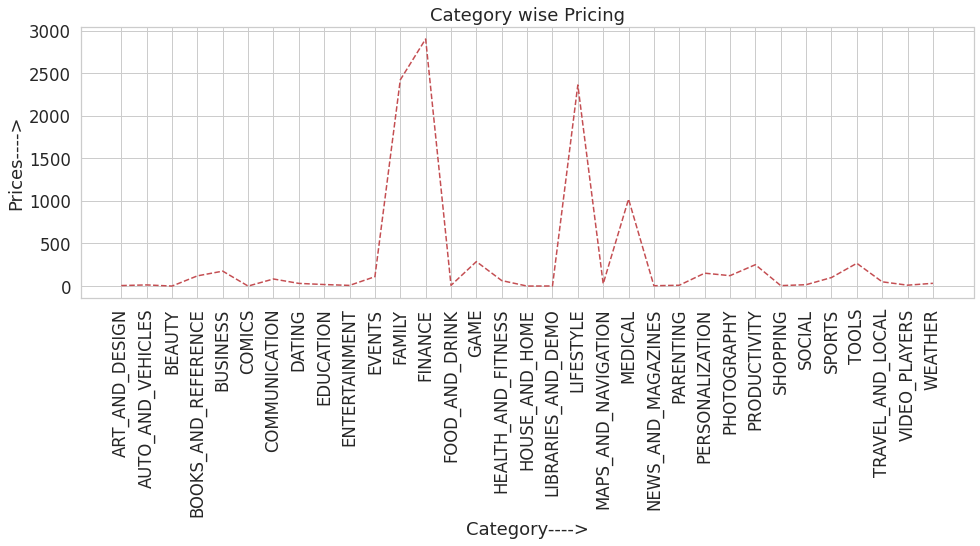

In [63]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Category---->')
plt.ylabel('Prices---->')
plt.show()

##The Finance, Lifestyle and Medical Category has got the highest pricing.

##Category wise Reviews

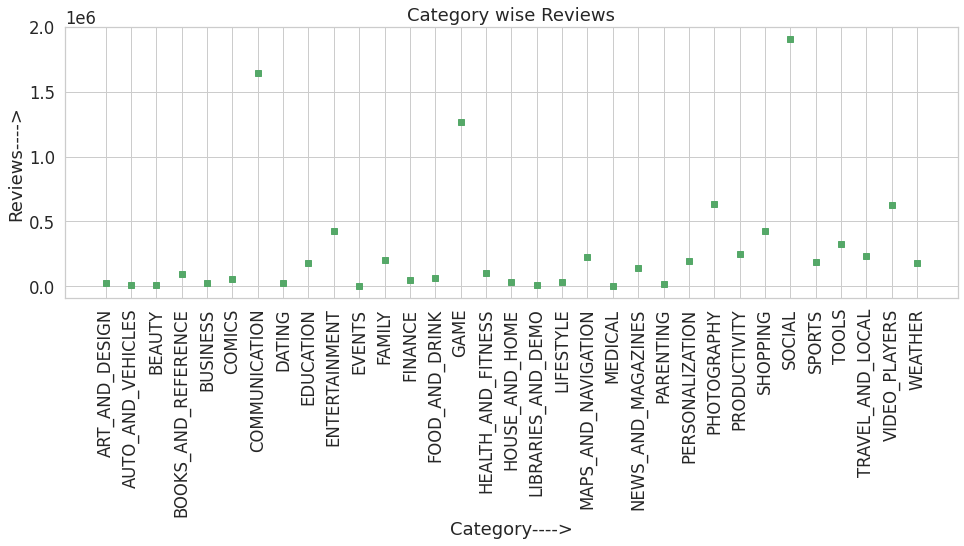

In [64]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Category---->')
plt.ylabel('Reviews---->')
plt.show()

##The Social, communication and Game category got the highest Reviews.

##Finally, we are in a state to plot and gain an insight into Genres wise analysis

###What are the top 20 apps present in the Play store as per their Genres?


In [65]:
top_genres = apps_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [66]:
genres_installs = apps_df.groupby(['Genres'])[['Installs']].sum()

In [67]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


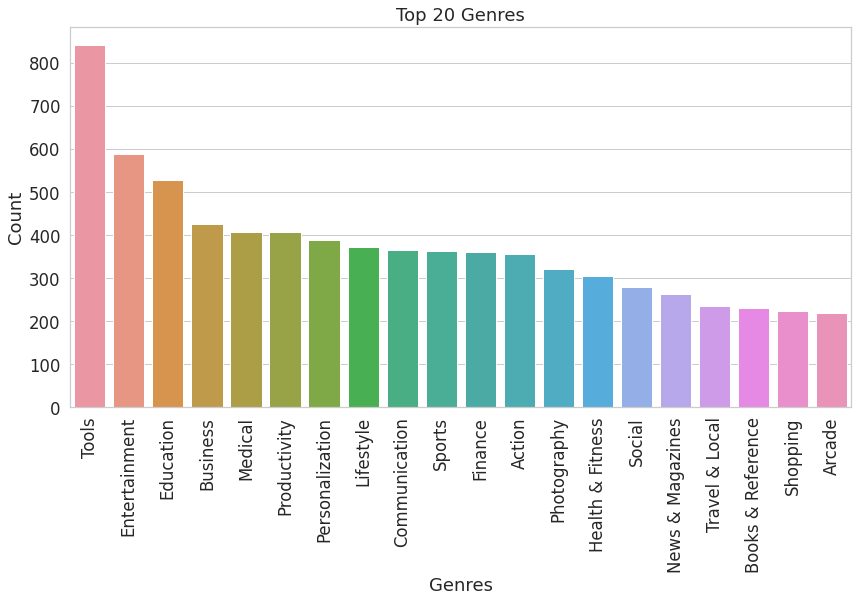

In [68]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

###Which are the Genres that are getting installed the most in top 20 Genres?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


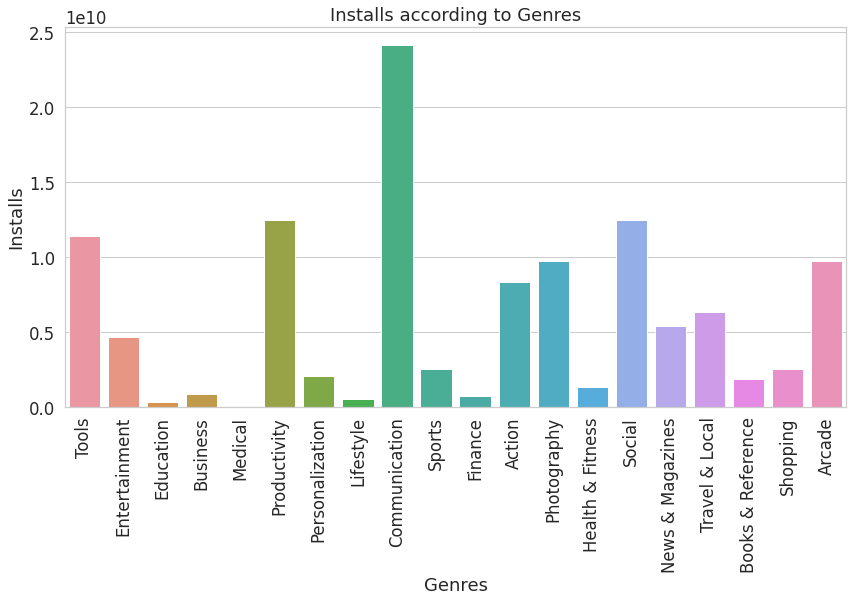

In [69]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

###From the above two plots: Maximum number of apps present in play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

In [70]:
top_category = apps_df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [71]:
category_installs = apps_df.groupby(['Category'])[['Installs']].sum()

In [72]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


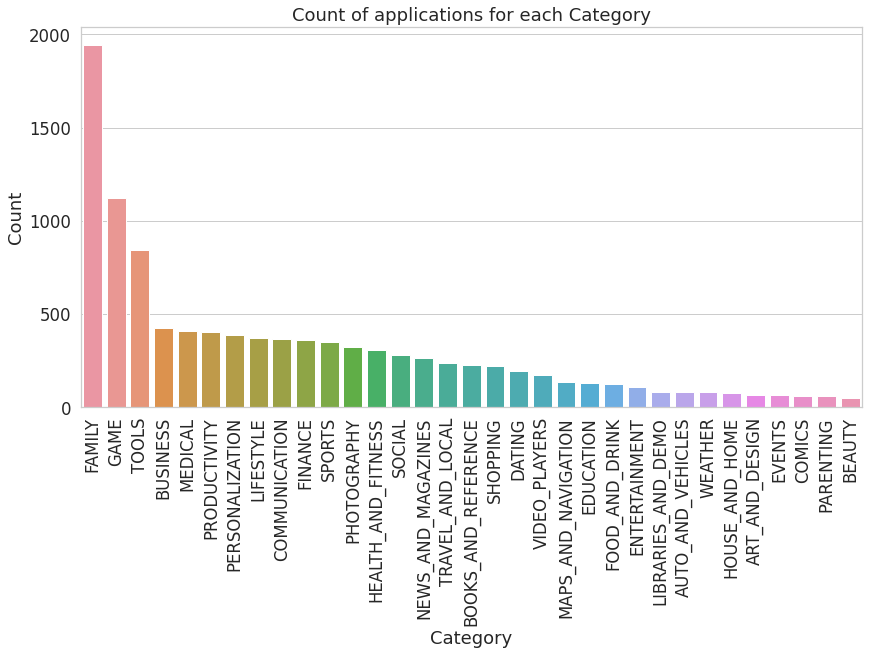

In [73]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.show()

###Maximum number of apps present in play store comes under Family, Game and Tools Category.


###Checking the Average rating

In [74]:
genres_ratings_df = apps_df.groupby(['Genres'])[['Rating']].mean()

In [75]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')

In [76]:
genres_installs_ratings['Rating'].describe()

count    119.000000
mean       4.267642
std        0.169731
min        3.800000
25%        4.168080
50%        4.279775
75%        4.350000
max        4.800000
Name: Rating, dtype: float64

###To find Average App Rating

In [77]:
apps_df['Rating'].mean()#average App Rating

4.203736603263601

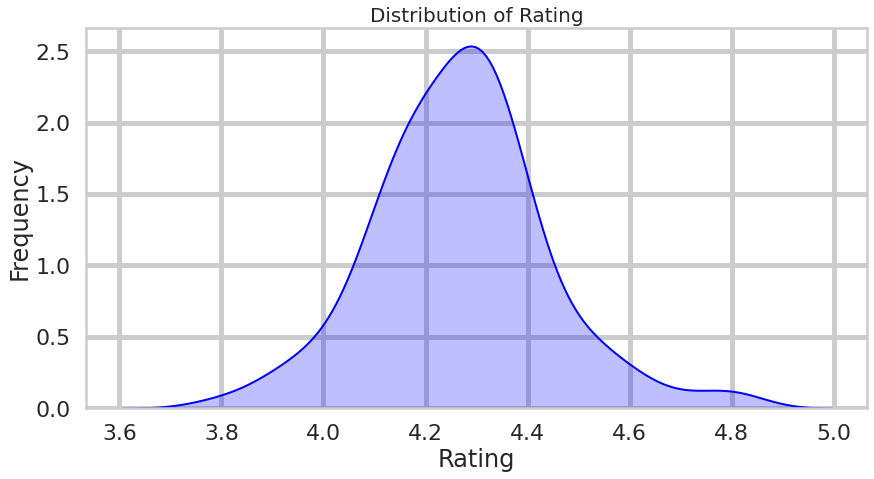

In [78]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

##Which category has the highest Average Rating

In [79]:
apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)# To understand the highest Average Rating?

Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.336522
PERSONALIZATION        4.327062
PARENTING              4.300000
BEAUTY                 4.283019
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
SOCIAL                 4.260714
SHOPPING               4.256250
WEATHER                4.248780
SPORTS                 4.239031
PRODUCTIVITY           4.219410
MEDICAL                4.212990
LIBRARIES_AND_DEMO     4.207059
AUTO_AND_VEHICLES      4.205882
FAMILY                 4.203757
PHOTOGRAPHY            4.189441
HOUSE_AND_HOME         4.185000
FOOD_AND_DRINK         4.183871
COMMUNICATION          4.175410
BUSINESS               4.175176
NEWS_AND_MAGAZINES     4.160985
COMICS                 4.160000
FINANCE                4.148056
ENTERTAINMENT          4.136036
LIFESTYLE              4.133244
TRAVEL_AND_LOCAL       4.121941
VIDEO_PLAYERS          4.084000
TOOLS                  4.080071

## Total Number of Apps having 5 star Rating

In [80]:
len(apps_df[apps_df['Rating']==5.0])#To find total number of Apps having 5 star Rating

271

###Highest rated Genres

> 




In [81]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [82]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


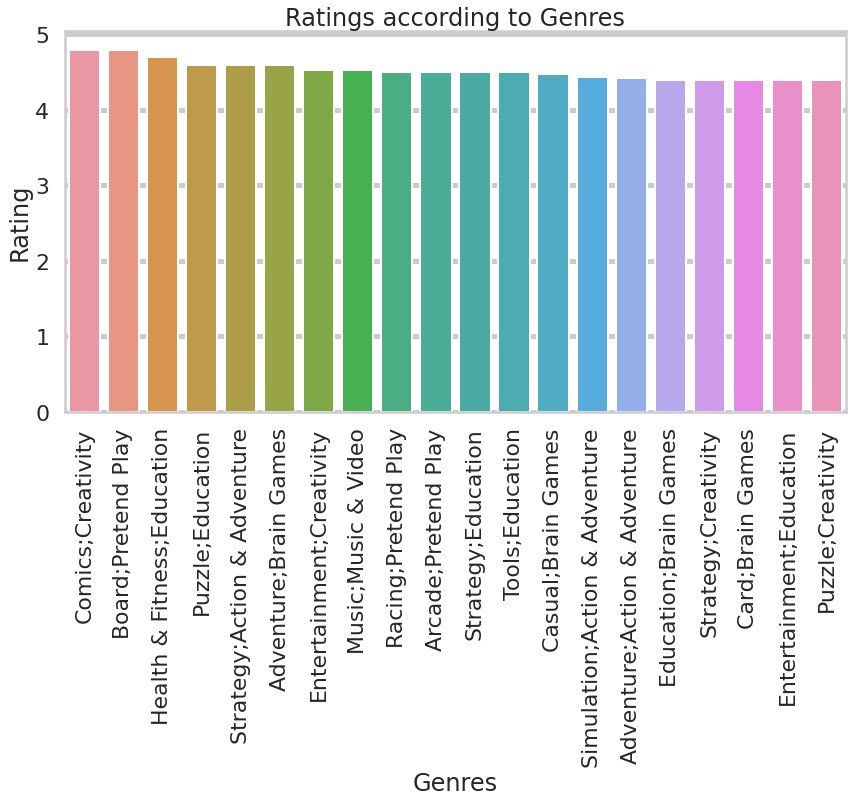

In [83]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

##Board;Pretebd Play, Comics;Creativity Health & fitness;Education

###Lowest rated Genres

In [84]:
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


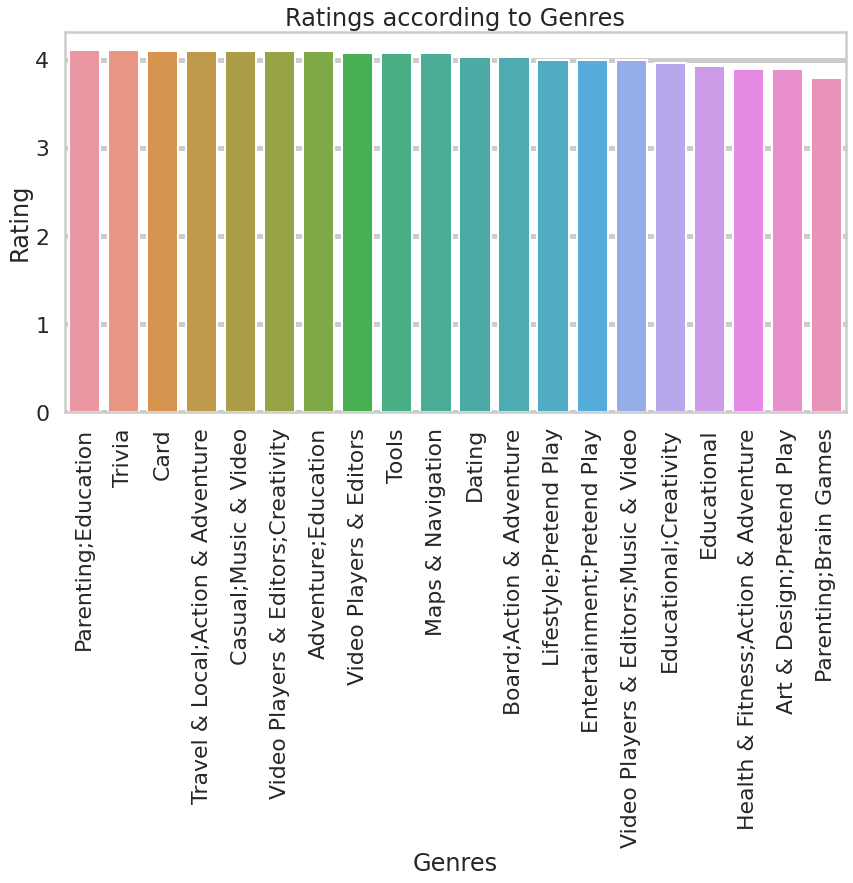

In [85]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)

Parenting;Brain gAMES,Health & fitness; Art and design

###The count of applications in each category differentiated by their type?


In [86]:
app_count = apps_df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [87]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

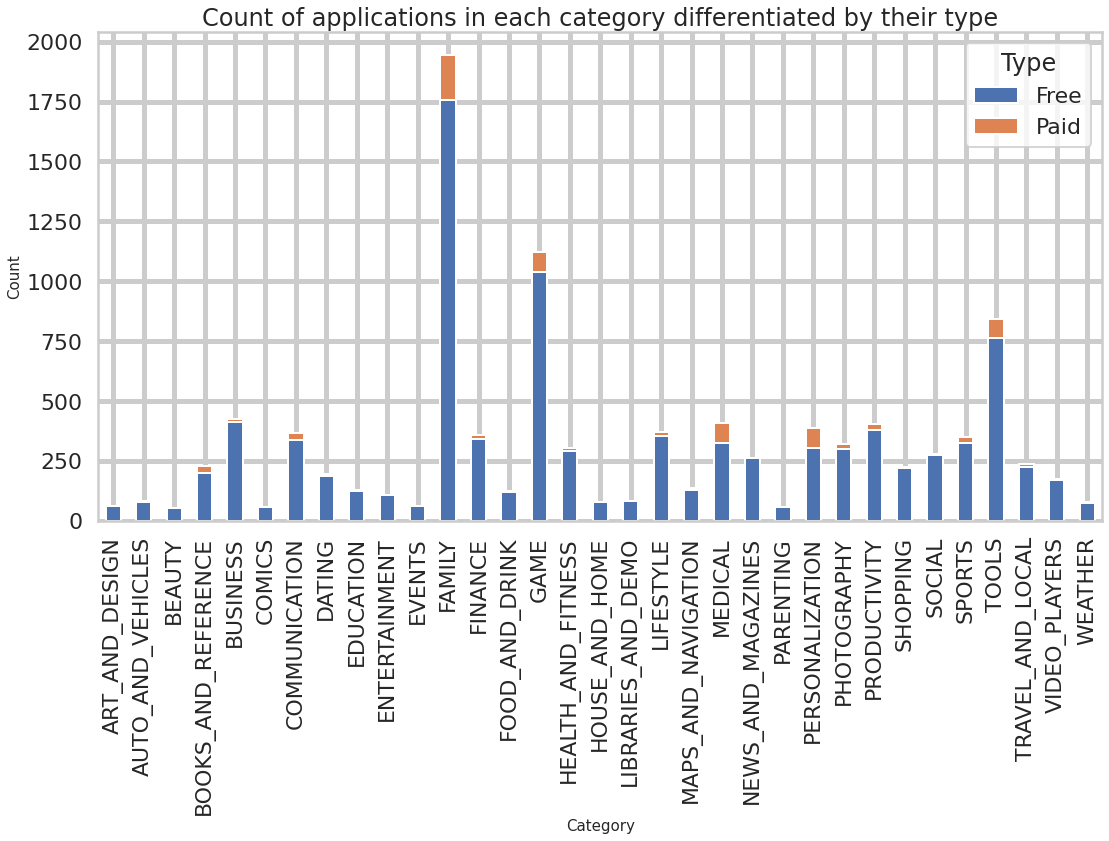

In [88]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

###Certain app categories have more free apps available for download than others. 
###In our dataset, the majority of apps in Family, Game and Tools, as well as Business categories were free to install. 
###At the same time Family, Game, Tools and Medical categories had the biggest number of paid apps available for download.


#How many apps were installed according to its type?


In [89]:
apps_df['Gaming Category App'] = apps_df['Category']=='GAME'

In [90]:
categoty_type_installs = apps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [91]:
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


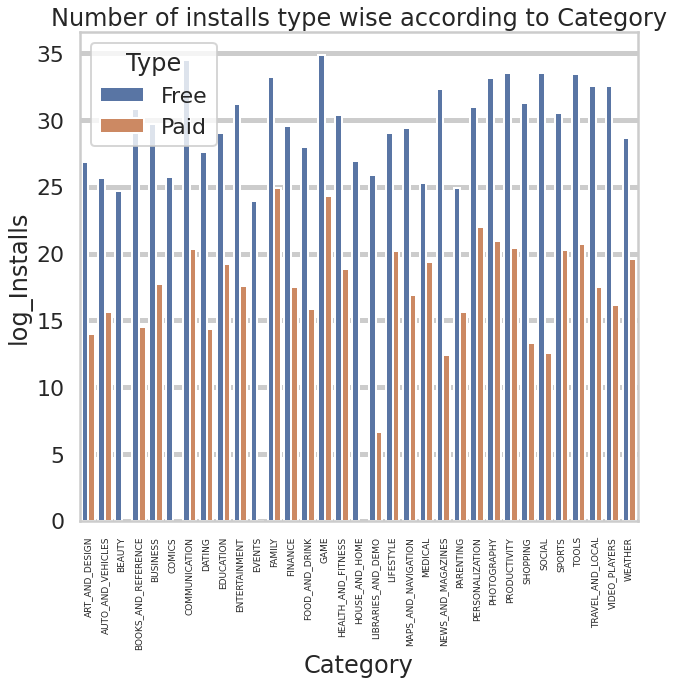

In [92]:
plt.figure(figsize=(10,9))
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

## Total number of free and paid apps

In [93]:
apps_df['Type'].value_counts()# To know the total number of free and paid apps.

Free    9592
Paid     765
Name: Type, dtype: int64

###The Average rating of free and paid apps

In [94]:
apps_df.groupby('Type')['Rating'].mean()#To find the average rating of free and paid apps 

Type
Free    4.19852
Paid    4.26915
Name: Rating, dtype: float64

##Free vs Paid

In [95]:
import matplotlib.pyplot as plt

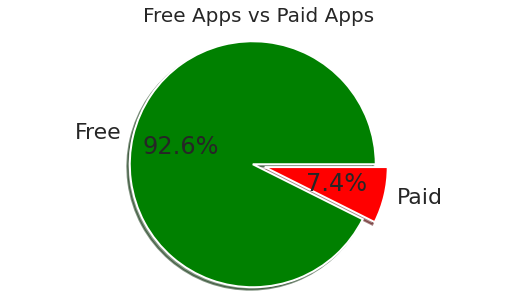

In [96]:
labels = apps_df['Type'].value_counts(sort = True).index
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Paid')
colors = ('green','red')
sizes = apps_df['Type'].value_counts(sort = True)
fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Free Apps vs Paid Apps', fontsize=20)
plt.show()

##Here we can see that 92.2% apps are free and 7.8% apps are paid apps, so we can say that most of the apps are free on Google Play Store.
##Therefore, it can be concluded that the number of free applications installed by the users are high when compared with the paid ones.

## The Apps got maximum and minimum reviews.

In [103]:
apps_df[apps_df['Reviews'].max()==apps_df['Reviews']]['App']# To understand which App has got maximum Reviews.

2544    Facebook
Name: App, dtype: object

In [104]:
apps_df[apps_df['Reviews'].min()==apps_df['Reviews']]['App']# To understand which App has got minimum Reviews.

478                                    Truth or Dare Pro
479      Private Dating, Hide App- Blue for PrivacyHider
621                                   Dating White Girls
623                                         Geeks Dating
627                                   CAM5678 Video Chat
                              ...                       
10773                                           FQ India
10774                                            Miss FQ
10798                               Word Search Tab 1 FR
10822                                          PLMGSS FR
10835                                           FR Forms
Name: App, Length: 593, dtype: object

## The App got highest and lowest price.

In [105]:
apps_df[apps_df['Price'].max()==apps_df['Price']]['App']# To understand which App has got high price.


4367    I'm Rich - Trump Edition
Name: App, dtype: object

In [106]:
apps_df[apps_df['Price'].min()==apps_df['Price']]['App']# To understand which App has got low price.

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 9592, dtype: object

##Display Top 5 Apps having highest reviews.

In [107]:
index=apps_df['Reviews'].sort_values(ascending=False).head().index# To display Top 5 Apps having Highest Reviews

In [108]:
apps_df.iloc[index]['App']

2901       Samsung SMART CAMERA App
4397           Guns'n'Glory Premium
369                Android Messages
4358                m>notes notepad
2966    Cristiano Ronaldo Wallpaper
Name: App, dtype: object

#<B>Loading Dataset: User Reviews

In [109]:
reviews_df = pd.read_csv('/content/drive/MyDrive/PROJECT/User Reviews.csv')

##Merging dataframes on apps


In [110]:
merged_df = apps_df.merge(reviews_df, on="App")

###<B>In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. 
###<B>Sentiment basically determines the view or the opinion of the writer, i.e., whether it is positive or negative or neutral. 
###<B>Sentiment Polarity defines the orientation of the expressed sentiment, it is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
###<B>Sentiment Subjectivity generally refer to personal opinion, emotion or judgment whereas objective refers to factual information, which lies in the range of [0,1].

###What is the distribution of type of reviews in the dataset?


In [111]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [112]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


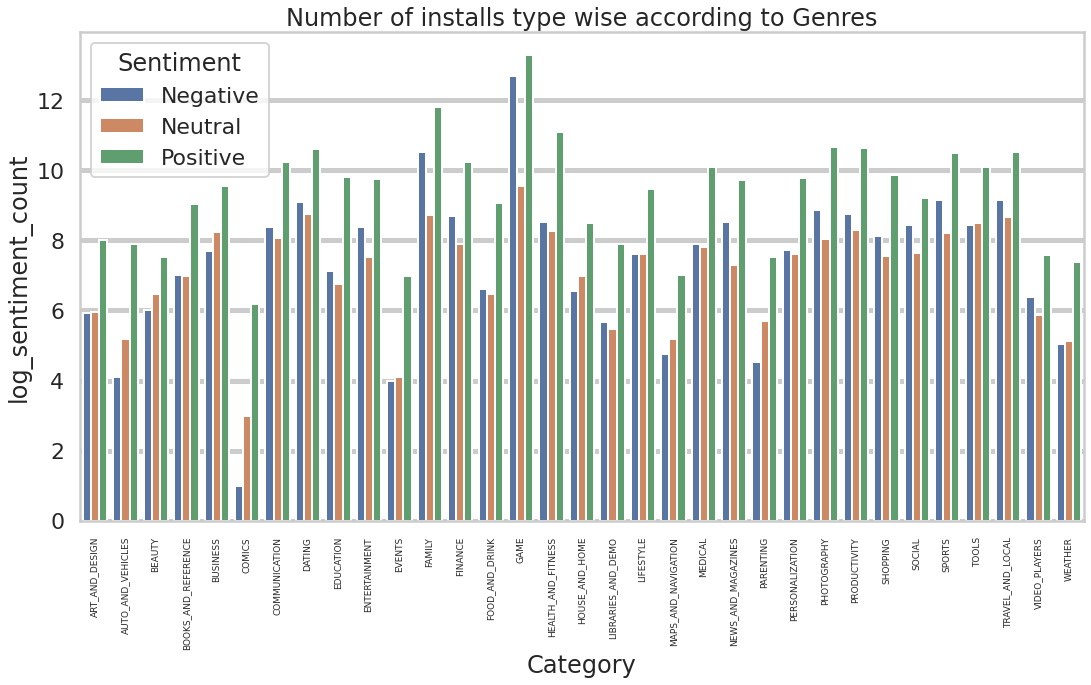

In [113]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Genres")
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

##Histogram of subjectivity


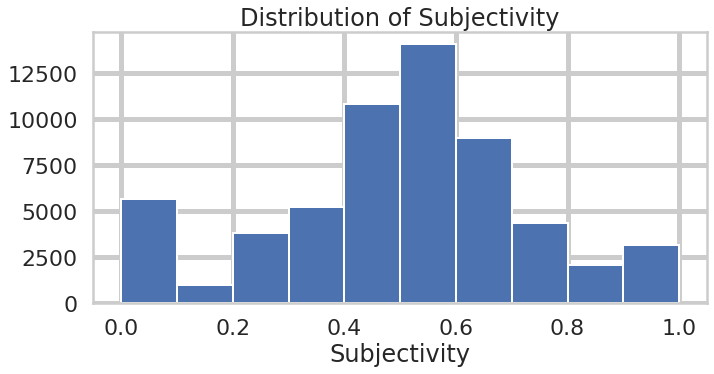

In [114]:
plt.figure(figsize=(11,5))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

##Here the maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users have given reviews to the applications, according to their experience.


##Does sentiment_subjectivity proportional to sentiment_polarity?

In [115]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [116]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

In [117]:
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


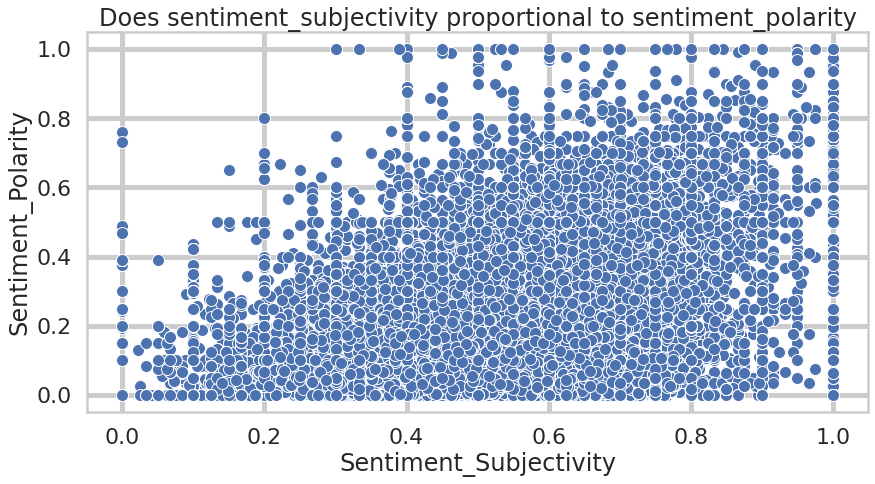

In [118]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

##From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.

##Review Sentiments - Percentage.


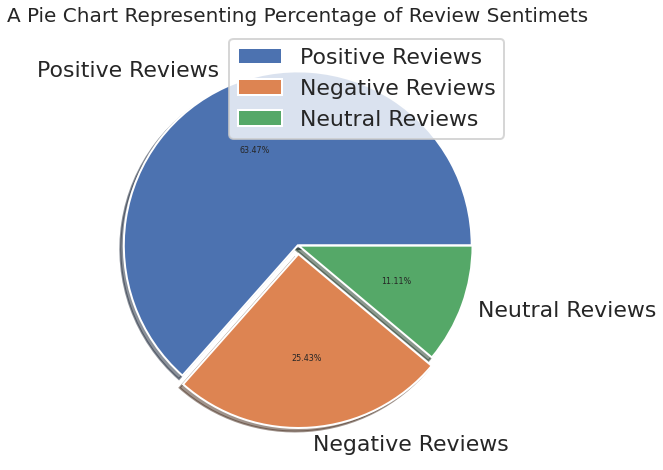

In [119]:
import matplotlib
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

##<B>Conclusion

#I started from scratch where the datasets we took was totally raw. I did a lot of cleaning on the data provided to bring it in a cleaner, representable form. Missing values were also removed in this process.

#My motive in whole projct was to analyse the data and find out main components that affects users decssion to download app. After completion of analysis I conclude that user prefer more of free apps. Most of the apps present in playstore are more or less of same size so size doesn’t affect their decsion much.

#I found most popular category of apps on two basis - Number of Installs and Number of reviews.

#A more can be done using Last updated variable where month can be seperated and clubbed with a lot of other variable in order to insightful information.This dataset contains a good set of possibilities, to work more on the business values and leaving with a positive impact. I can explore more interesting facts and figures using this project.